<a href="https://colab.research.google.com/github/miggelucas/Instrumento-Medidas-de-Prote-o-contra-Covid-19/blob/main/Medidas_de_Prote%C3%A7%C3%A3o_contra_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instrumento Medidas de Proteção contra a Covid-19

Durante a pandemia, um grupo de estudo de psicologia buscou compreender melhor quais seriam as possíveis variáveis psicológicas envolvidas no comportamento de proteção em relação à Covid-19. Para isso, era necessário, primeiramente, possuir um instrumento que fosse capaz de medir o comportamento das pessoas em relação a esse fator. Compreendeu-se que os comportametnos poderiam se distiguir em dois fatores: 

*   Comportamento de Distanciamento Social
*   Comportamento Higiênico

O primeiro fator seria composto por itens que expressam a identificação do sujeito com comportamentos de evitar aglomerações sociais, contato físico com outras pessoas e tendência a permanecer em casa. Já o segundo seria composto por items relacioandos tendência de lavar as mãos, usar álcool em gel e utilizar máscara.

Esse Notebook busca analizar as propriedades psicométricas dessa escala composta por 17 itens.



# Preparação

In [226]:
pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [227]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [228]:
# importando bibliotecas necessárias

import pandas as pd
import pingouin as pg
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import factor_analyzer
from sklearn.preprocessing import StandardScaler

In [229]:
df = pd.read_csv("Medidas de Proteção contra a Covid - Base de Dados - Página1.csv")
df

,Uso de máscara cobrindo a boca e o nariz,Uso de luvas ao sair de casa,Evitar comer ou beber em locais públicos,Lavar as mãos com água e sabão frequentemente,Higienizar as mãos com álcool em gel,Higienizar as alças dos carrinhos/cestas de compras no supermercado,"Evitar o compartilhamento de copos, pratos e outros objetos de uso pessoal",Evitar abraços e apertos de mão,Ficar em casa,Lavar as embalagens das compras de supermercado com água e sabão,Manter o distanciamento de outras pessoas,"Evitar locais fechados (shoppings, igrejas, academias, padarias, etc...)","Evitar levar a mão ao rosto (olhos, nariz e boca)",Deixar os sapatos fora de casa (ou separados) quando chegar da rua,Tomar banho ao chegar em casa,Tirar as roupas e separá-las para a lavagem quando chegar em casa,Cobrir a boca quando tossir ou espirrar
0,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,5,1,3,3,4,3,4,4,4,4,4,4,2,5,3,2,4
3,5,1,3,4,5,2,3,5,5,2,5,5,5,2,5,5,5
4,5,1,3,4,5,2,3,5,5,2,4,5,5,1,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,5,1,4,5,5,4,5,5,4,5,4,4,5,5,3,3,5
198,5,1,5,5,5,2,5,5,4,4,5,5,5,3,4,5,5
199,5,1,4,5,5,5,4,5,4,2,5,5,3,5,4,2,5
200,5,1,4,5,5,5,5,4,3,2,4,5,2,5,4,5,5


In [230]:
print("lista de itens \n")

for coluna in df.columns:
  print(coluna)

lista de itens 

Uso de máscara cobrindo a boca e o nariz
Uso de luvas ao sair de casa
Evitar comer ou beber em locais públicos
Lavar as mãos com água e sabão frequentemente
Higienizar as mãos com álcool em gel
Higienizar as alças dos carrinhos/cestas de compras no supermercado
Evitar o compartilhamento de copos, pratos e outros objetos de uso pessoal
Evitar abraços e apertos de mão
Ficar em casa
Lavar as embalagens das compras de supermercado com água e sabão
Manter o distanciamento de outras pessoas
Evitar locais fechados (shoppings, igrejas, academias, padarias, etc...)
Evitar levar a mão ao rosto (olhos, nariz e boca)
Deixar os sapatos fora de casa (ou separados) quando chegar da rua
Tomar banho ao chegar em casa
Tirar as roupas e separá-las para a lavagem quando chegar em casa
Cobrir a boca quando tossir ou espirrar


In [231]:
# Calculando o kmo e barlett

stats, p_value = factor_analyzer.calculate_bartlett_sphericity(df)
kmo_all, kmo_model = factor_analyzer.calculate_kmo(df)


print("### Testes de adequação para análise fatorial ### \n")
print(f"Índice KMO do dataframe: {kmo_model}")
print(f"pValor para o teste de Barlett: {p_value}")

### Testes de adequação para análise fatorial ### 

Índice KMO do dataframe: 0.8559128410006458
pValor para o teste de Barlett: 3.195145359744331e-167


Os índices indicam que a amostra possui bom ajuste para ser realizada uma análise fatorial

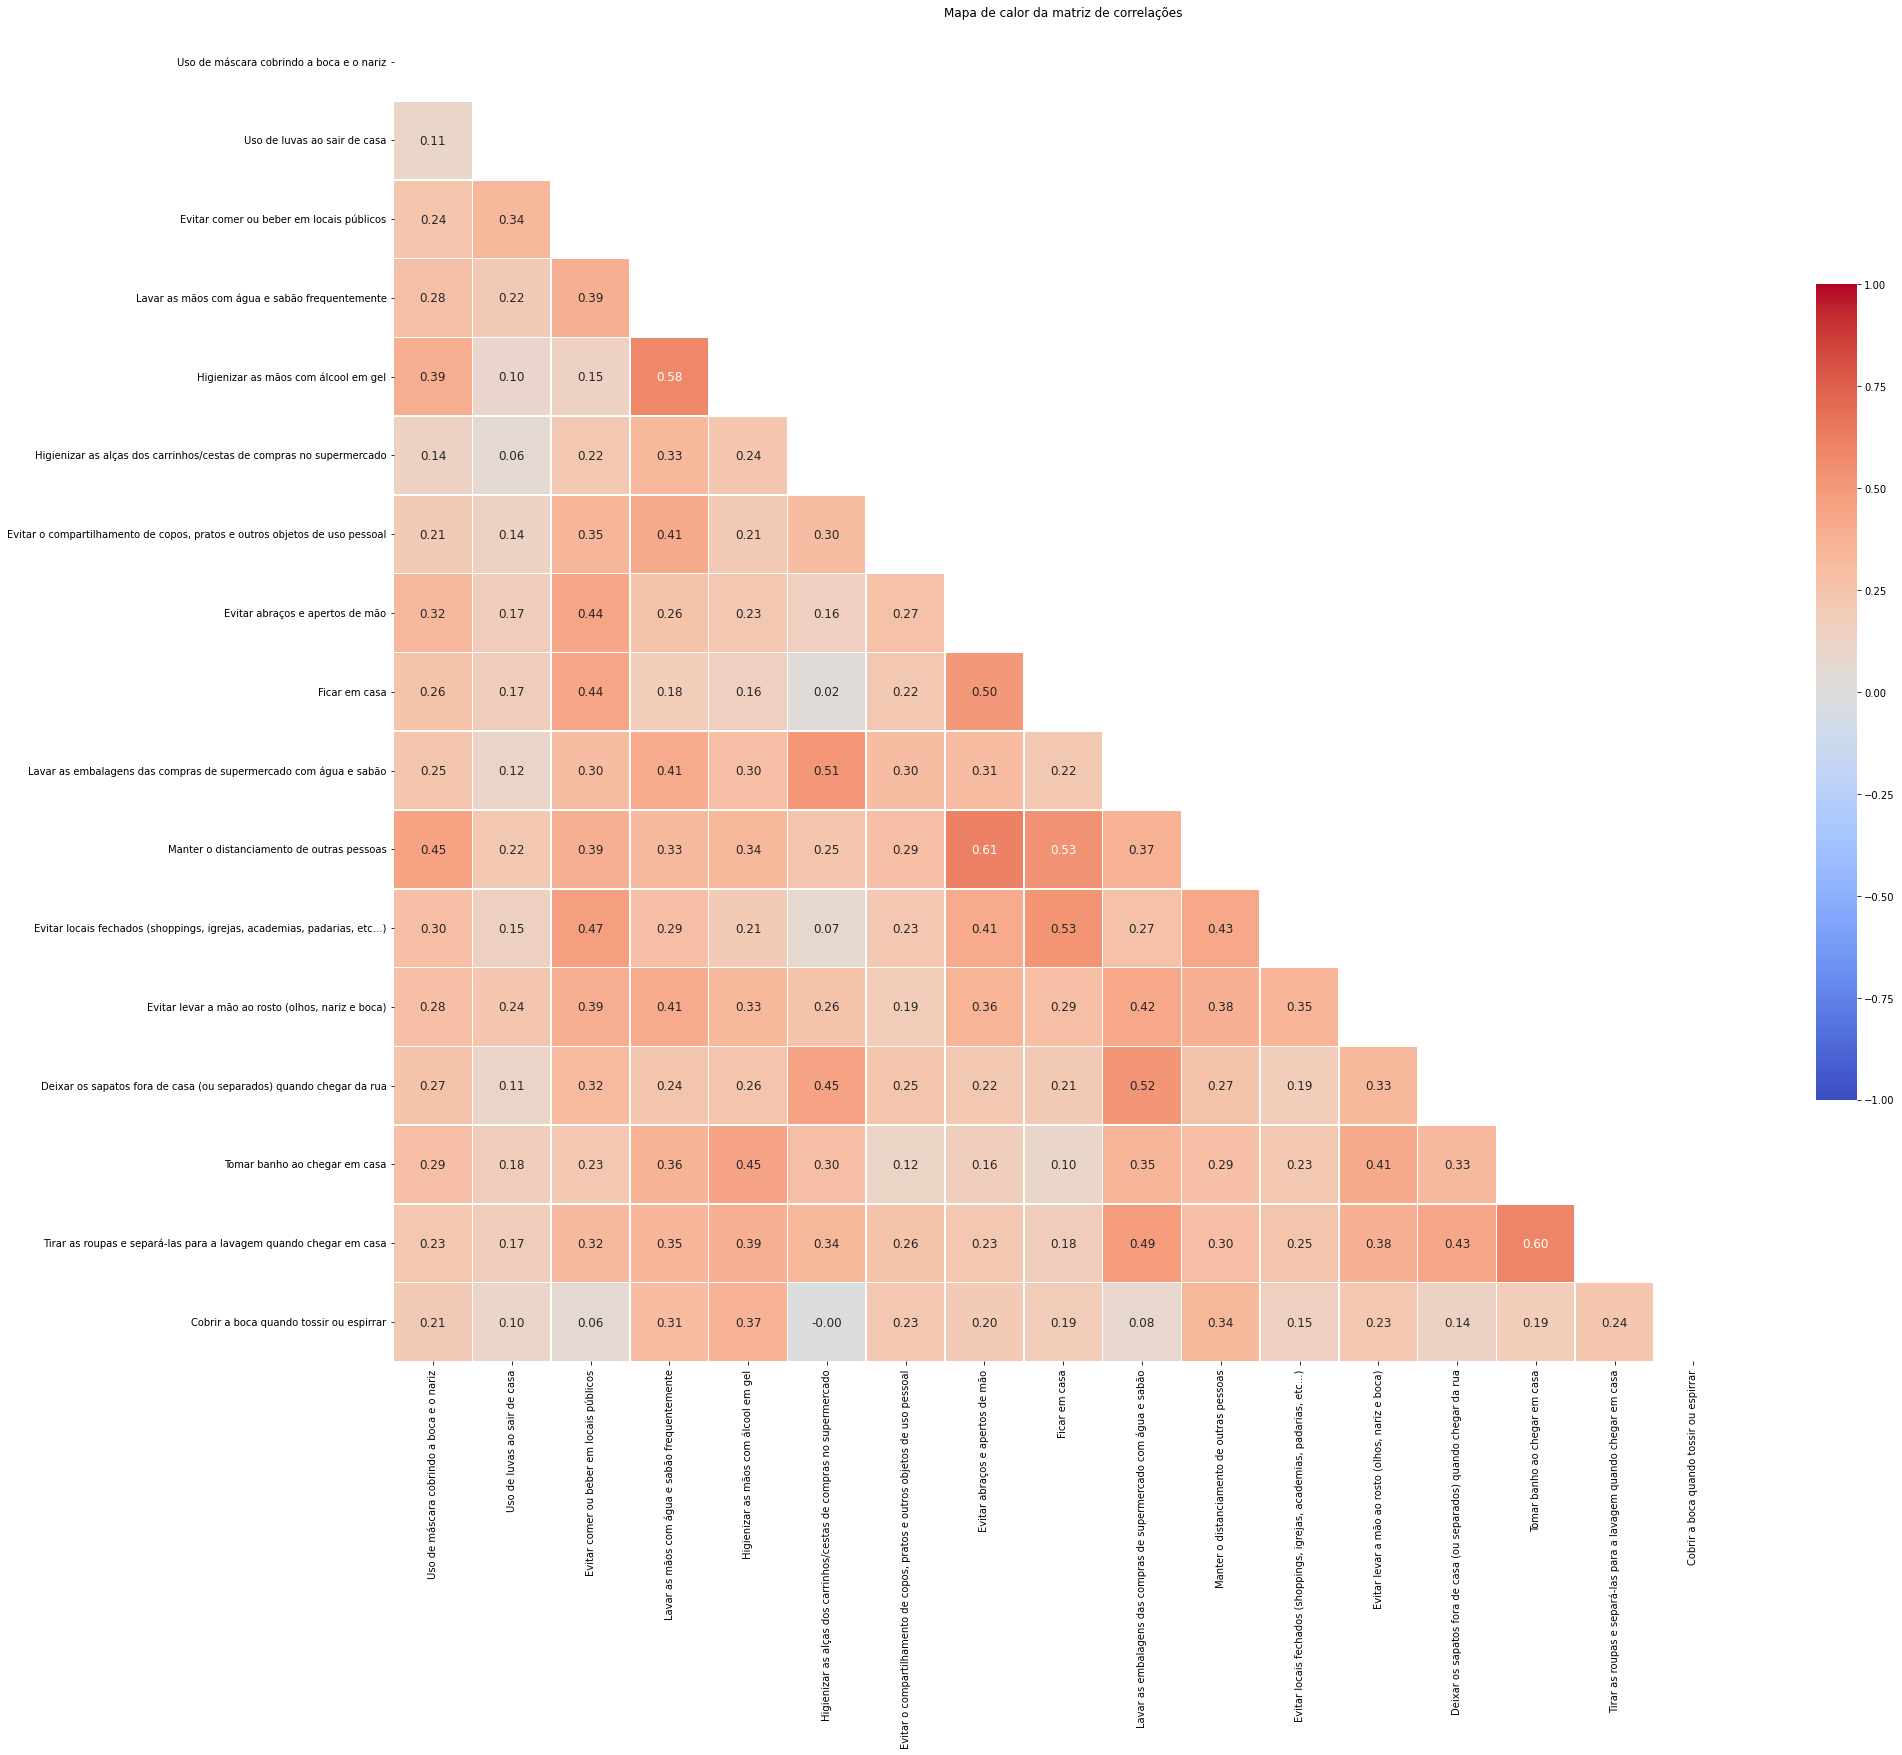

In [232]:
# Visualizando correlação

corr_matrix = pd.DataFrame(df.corr())

fig, ax = plt.subplots(figsize=(30, 30))
ax.set_title('Mapa de calor da matriz de correlações')

# Criar a máscara para mostrar apenas as correlações uma vez
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Criar o mapa de calor
sns.heatmap(corr_matrix, cmap='coolwarm', square = True,
            annot=True, xticklabels=corr_matrix.columns, mask= mask,
            yticklabels=corr_matrix.columns, cbar_kws={'shrink': .5},
            annot_kws={'size': 12}, fmt='.2f', linewidths=.5, vmax=1, vmin=-1)

Uma visualização das correlações através de um mapa de calor não indicou a priori uma existência de fatores distintos para o intrumento

# Análise Fatorial

[ 5.26370907  1.33012837  0.9417618   0.78513958  0.65842271  0.50478334
  0.43758388  0.32767163  0.18975542  0.1381518  -0.04722297 -0.09070996
 -0.11794612 -0.13161646 -0.16745209 -0.21066635 -0.26574873]


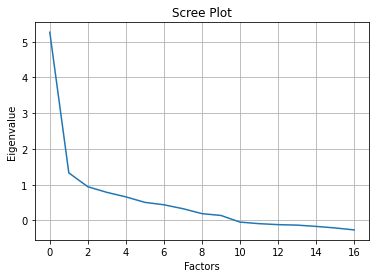

In [233]:
fa= factor_analyzer.FactorAnalyzer(n_factors= 10, rotation= "oblimin", method= "minres")
fa.fit(df)
ev, v = fa.get_eigenvalues()

print(v)
plt.plot(v)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()

Uma análise fatorial exploratória possui dois indicativos para escolha de 3 fatores: 


*   A técnica de cotovelo do scree plot indica visualmente a escolha de 2 fatores
*   O limiar de 1 para o eigenvalue também indica a adoção de apenas 2 fatores
*   Modelo teórico indica a adoção de fatores

Também será realizada uma análise explorando o intrumento como um fator geral uma vez que o segundo fator apresentou um autovalor próximo ao limiar de 1.

In [234]:
fa= factor_analyzer.FactorAnalyzer(n_factors= 1, rotation= "varimax", method= "minres")
fa.fit(df)
fa_matrix_cargas_fatoriais_geral = pd.DataFrame(fa.loadings_, columns = ["Fator geral - cargas"])
fa_matrix_cargas_fatoriais_geral

/usr/local/lib/python3.8/dist-packages/factor_analyzer/factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


,Fator geral - cargas
0,0.497052
1,0.302026
2,0.592395
3,0.626309
4,0.551315
5,0.439526
6,0.461793
7,0.578386
8,0.499831
9,0.625156


In [235]:
variance_df_geral = pd.DataFrame(fa.get_factor_variance(), columns = ["Fator Geral"],
             index = ["variance", "proportional_variance", "cumulative_variances"])

variance_df_geral

,Fator Geral
variance,4.979346
proportional_variance,0.292903
cumulative_variances,0.292903


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8658efc310>],
      dtype=object)

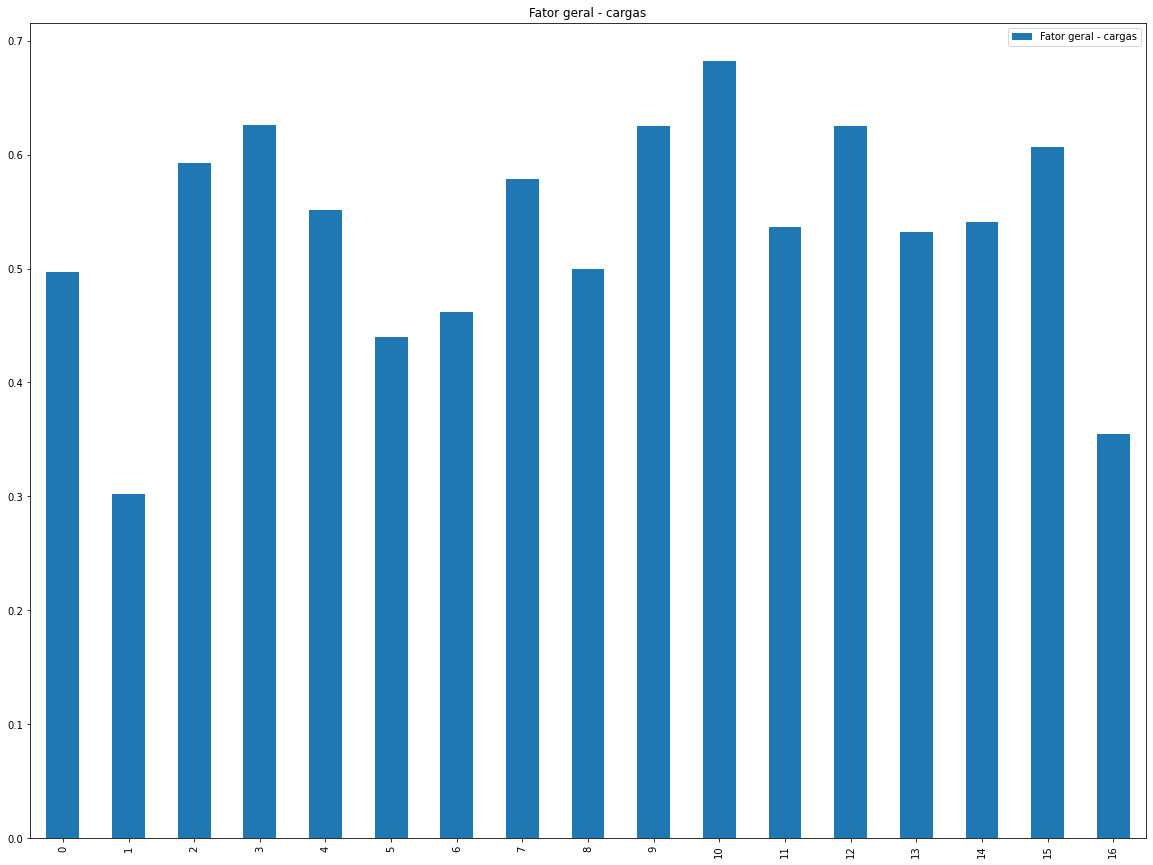

In [236]:
fa_matrix_cargas_fatoriais_geral.plot(subplots = True, kind = "bar", figsize= (20,15), sharex = False)

In [237]:
fa= factor_analyzer.FactorAnalyzer(n_factors= 2, rotation= "oblimin", method= "minres")
fa.fit(df)
fa_matrix_cargas_fatoriais = pd.DataFrame(fa.loadings_, columns = ["FA{}".format(i) for i in range(1,2+1)])
fa_matrix_cargas_fatoriais

,FA1,FA2
0,0.262199,0.317343
1,0.120023,0.235968
2,0.186263,0.524457
3,0.567718,0.142040
4,0.560050,0.061854
5,0.631349,-0.142668
6,0.308190,0.223302
7,0.034929,0.689570
8,-0.149508,0.812406
9,0.653437,0.055882


In [238]:
variance_df_fatores = pd.DataFrame(fa.get_factor_variance(), columns = ["FA1", "FA2"],
             index = ["variance", "proportional_variance", "cumulative_variances"])

variance_df_fatores

,FA1,FA2
variance,3.243336,2.613694
proportional_variance,0.190784,0.153747
cumulative_variances,0.190784,0.344531


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8658e78f70>,
      dtype=object)

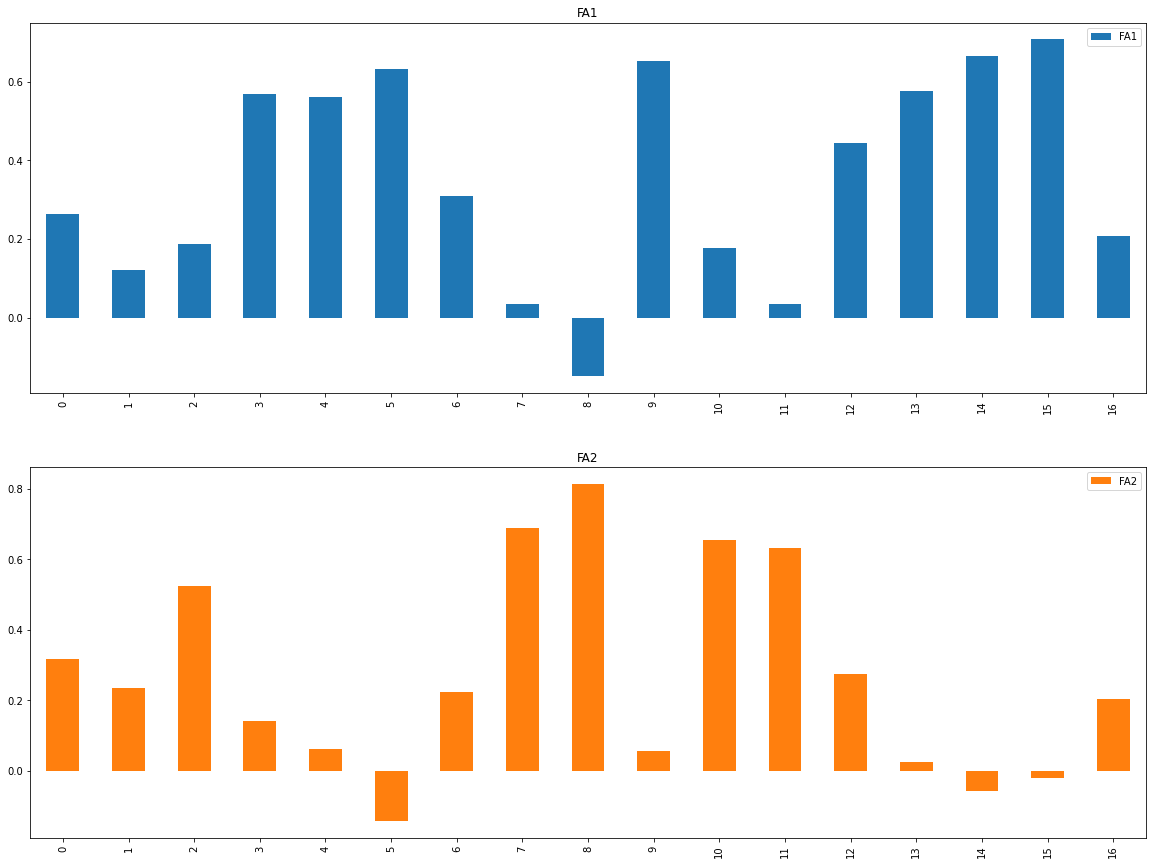

In [239]:
fa_matrix_cargas_fatoriais.plot(subplots = True, kind = "bar", figsize= (20,15), sharex = False)

In [240]:
fa1 = fa_matrix_cargas_fatoriais.query("FA1 > 0.3 or FA1 < -0.3")
fa1.sort_values("FA1", ascending= False)

,FA1,FA2
15,0.706844,-0.019145
14,0.665335,-0.056422
9,0.653437,0.055882
5,0.631349,-0.142668
13,0.575706,0.024630
3,0.567718,0.142040
4,0.560050,0.061854
12,0.443787,0.273279
6,0.308190,0.223302


In [241]:
df_fa1= df.iloc[:, fa1.index]

print("Cojunto de items para o primeiro fator: \n")
for item in df_fa1.columns:
  print(item)

Cojunto de items para o primeiro fator: 

Lavar as mãos com água e sabão frequentemente
Higienizar as mãos com álcool em gel
Higienizar as alças dos carrinhos/cestas de compras no supermercado
Evitar o compartilhamento de copos, pratos e outros objetos de uso pessoal
Lavar as embalagens das compras de supermercado com água e sabão
Evitar levar a mão ao rosto (olhos, nariz e boca)
Deixar os sapatos fora de casa (ou separados) quando chegar da rua
Tomar banho ao chegar em casa
Tirar as roupas e separá-las para a lavagem quando chegar em casa


O conteúdo do primeiro fator formado se relaciona a comportametos de higiene

In [242]:
fa2 = fa_matrix_cargas_fatoriais.query("FA2 > 0.3 or FA2 < -0.3")
fa2.sort_values("FA1", ascending= False)

,FA1,FA2
0,0.262199,0.317343
2,0.186263,0.524457
10,0.175847,0.654655
11,0.035085,0.632634
7,0.034929,0.689570
8,-0.149508,0.812406


In [243]:
df_fa2= df.iloc[:, fa2.index]

print("Cojunto de items para o segundo fator: \n")
for item in df_fa2.columns:
  print(item)

Cojunto de items para o segundo fator: 

Uso de máscara cobrindo a boca e o nariz
Evitar comer ou beber em locais públicos
Evitar abraços e apertos de mão
Ficar em casa
Manter o distanciamento de outras pessoas
Evitar locais fechados (shoppings, igrejas, academias, padarias, etc...)


O segundo fator formado se relaciona a comportamentos de distanciamento social

# Precisão

In [244]:
def calc_alpha(df):
  # Calculando Alpha de Cronbach
  alpha = pg.cronbach_alpha(df)

  print(f"Alpha geral: {round(alpha[0], 3)} \n")

  prints_aumento = []
  prints_diminuiu = []

  # Calculando Alpha de Cronbach após a remoção de um item
  for col in df.columns:

      df_temp = df.drop(col, axis=1)
      alpha_temp = pg.cronbach_alpha(df_temp)

      if alpha_temp > alpha:
          prints_aumento.append(f"Remoção do item {col} aumentou o Alpha de {round(alpha[0], 3)} para {round(alpha_temp[0], 3)}")
      else:
          prints_diminuiu.append(f"Remoção do item {col} não afetou o Alpha : Alpha={round(alpha_temp[0], 3)}")

  # Prints
  if len(prints_aumento) == 0:

    print("### A remoção de itens não melhora o coeficiente ###\n")
    
    for i in prints_diminuiu:
      print(i)

  else:
    print("### Aumento de coeficiente ### \n")
    for i in prints_aumento:
      print(i)

    print("\n")

    print("### Diminuição de coeficiente ### \n")
    for i in prints_diminuiu:
      print(i)

        


In [245]:
# alpha fator geral

calc_alpha(df)

Alpha geral: 0.862 

### Aumento de coeficiente ### 

Remoção do item Uso de luvas ao sair de casa aumentou o Alpha de 0.862 para 0.862


### Diminuição de coeficiente ### 

Remoção do item Uso de máscara cobrindo a boca e o nariz não afetou o Alpha : Alpha=0.859
Remoção do item Evitar comer ou beber em locais públicos não afetou o Alpha : Alpha=0.85
Remoção do item Lavar as mãos com água e sabão frequentemente não afetou o Alpha : Alpha=0.852
Remoção do item Higienizar as mãos com álcool em gel não afetou o Alpha : Alpha=0.856
Remoção do item Higienizar as alças dos carrinhos/cestas de compras no supermercado não afetou o Alpha : Alpha=0.859
Remoção do item Evitar o compartilhamento de copos, pratos e outros objetos de uso pessoal não afetou o Alpha : Alpha=0.856
Remoção do item Evitar abraços e apertos de mão não afetou o Alpha : Alpha=0.853
Remoção do item Ficar em casa não afetou o Alpha : Alpha=0.856
Remoção do item Lavar as embalagens das compras de supermercado com água e sabão 

O fator geral apresenta bons índices de confiabilidade. Foi indicado que a remoção de um dos itens seria positivo para incrimento do coeficiente, no entanto, a mudança não possui magnitude suficiente para justificar a modificação.

In [246]:
# alpha comportamento higiênico

calc_alpha(df_fa1)

Alpha geral: 0.821 

### A remoção de itens não melhora o coeficiente ###

Remoção do item Lavar as mãos com água e sabão frequentemente não afetou o Alpha : Alpha=0.803
Remoção do item Higienizar as mãos com álcool em gel não afetou o Alpha : Alpha=0.812
Remoção do item Higienizar as alças dos carrinhos/cestas de compras no supermercado não afetou o Alpha : Alpha=0.803
Remoção do item Evitar o compartilhamento de copos, pratos e outros objetos de uso pessoal não afetou o Alpha : Alpha=0.818
Remoção do item Lavar as embalagens das compras de supermercado com água e sabão não afetou o Alpha : Alpha=0.785
Remoção do item Evitar levar a mão ao rosto (olhos, nariz e boca) não afetou o Alpha : Alpha=0.805
Remoção do item Deixar os sapatos fora de casa (ou separados) quando chegar da rua não afetou o Alpha : Alpha=0.8
Remoção do item Tomar banho ao chegar em casa não afetou o Alpha : Alpha=0.805
Remoção do item Tirar as roupas e separá-las para a lavagem quando chegar em casa não afetou o Al

O fator relacioando a comportamento higiênico apresentou bons índices de fidedignidade

In [247]:
# alpha comportamento distanciamento

calc_alpha(df_fa2)

Alpha geral: 0.809 

### Aumento de coeficiente ### 

Remoção do item Uso de máscara cobrindo a boca e o nariz aumentou o Alpha de 0.809 para 0.815


### Diminuição de coeficiente ### 

Remoção do item Evitar comer ou beber em locais públicos não afetou o Alpha : Alpha=0.789
Remoção do item Evitar abraços e apertos de mão não afetou o Alpha : Alpha=0.763
Remoção do item Ficar em casa não afetou o Alpha : Alpha=0.762
Remoção do item Manter o distanciamento de outras pessoas não afetou o Alpha : Alpha=0.76
Remoção do item Evitar locais fechados (shoppings, igrejas, academias, padarias, etc...) não afetou o Alpha : Alpha=0.773


O fator relacioando a comportamentos de distanciamento social apresentou bons índices de confiabilidade. Foi indicado que a eliminação de um dos itens seria capaz de elevar o coeficiente. É discutível se a sua remoção seria justificável, uma vez que o fator apresenta poucos itens e o aumento do coeficiente seria insuficiente. Optou-se por pela sua remoção devido ao conteúdo do item não se relacionar devidamente ao fator proposto

In [248]:
df_fa2.drop(["Uso de máscara cobrindo a boca e o nariz"], axis = 1, inplace = True)
calc_alpha(df_fa2)

Alpha geral: 0.815 

### A remoção de itens não melhora o coeficiente ###

Remoção do item Evitar comer ou beber em locais públicos não afetou o Alpha : Alpha=0.799
Remoção do item Evitar abraços e apertos de mão não afetou o Alpha : Alpha=0.771
Remoção do item Ficar em casa não afetou o Alpha : Alpha=0.767
Remoção do item Manter o distanciamento de outras pessoas não afetou o Alpha : Alpha=0.774
Remoção do item Evitar locais fechados (shoppings, igrejas, academias, padarias, etc...) não afetou o Alpha : Alpha=0.783


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Scores

In [249]:
fa_matrix_cargas_fatoriais_geral.index = df.columns
fa_matrix_cargas_fatoriais_geral = fa_matrix_cargas_fatoriais_geral.transpose()

df_geral_tratado = df.copy()

for col in df_geral_tratado:
  df_geral_tratado[col] = df_geral_tratado[[col]].to_numpy() * fa_matrix_cargas_fatoriais_geral[[col]].to_numpy()

df_geral_tratado

,Uso de máscara cobrindo a boca e o nariz,Uso de luvas ao sair de casa,Evitar comer ou beber em locais públicos,Lavar as mãos com água e sabão frequentemente,Higienizar as mãos com álcool em gel,Higienizar as alças dos carrinhos/cestas de compras no supermercado,"Evitar o compartilhamento de copos, pratos e outros objetos de uso pessoal",Evitar abraços e apertos de mão,Ficar em casa,Lavar as embalagens das compras de supermercado com água e sabão,Manter o distanciamento de outras pessoas,"Evitar locais fechados (shoppings, igrejas, academias, padarias, etc...)","Evitar levar a mão ao rosto (olhos, nariz e boca)",Deixar os sapatos fora de casa (ou separados) quando chegar da rua,Tomar banho ao chegar em casa,Tirar as roupas e separá-las para a lavagem quando chegar em casa,Cobrir a boca quando tossir ou espirrar
0,2.485262,1.208105,2.961975,3.131543,2.756573,2.197630,2.308963,2.891928,2.499156,3.125781,3.408842,2.681513,3.125709,2.659806,2.703680,3.033344,1.772361
1,2.485262,1.510132,2.961975,3.131543,2.756573,2.197630,2.308963,2.891928,2.499156,3.125781,3.408842,2.681513,3.125709,2.659806,2.703680,3.033344,1.772361
2,2.485262,0.302026,1.777185,1.878926,2.205258,1.318578,1.847170,2.313542,1.999324,2.500625,2.727074,2.145210,1.250283,2.659806,1.622208,1.213337,1.417889
3,2.485262,0.302026,1.777185,2.505235,2.756573,0.879052,1.385378,2.891928,2.499156,1.250312,3.408842,2.681513,3.125709,1.063922,2.703680,3.033344,1.772361
4,2.485262,0.302026,1.777185,2.505235,2.756573,0.879052,1.385378,2.891928,2.499156,1.250312,2.727074,2.681513,3.125709,0.531961,2.703680,2.426675,1.772361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2.485262,0.302026,2.369580,3.131543,2.756573,1.758104,2.308963,2.891928,1.999324,3.125781,2.727074,2.145210,3.125709,2.659806,1.622208,1.820006,1.772361
198,2.485262,0.302026,2.961975,3.131543,2.756573,0.879052,2.308963,2.891928,1.999324,2.500625,3.408842,2.681513,3.125709,1.595883,2.162944,3.033344,1.772361
199,2.485262,0.302026,2.369580,3.131543,2.756573,2.197630,1.847170,2.891928,1.999324,1.250312,3.408842,2.681513,1.875425,2.659806,2.162944,1.213337,1.772361
200,2.485262,0.302026,2.369580,3.131543,2.756573,2.197630,2.308963,2.313542,1.499493,1.250312,2.727074,2.681513,1.250283,2.659806,2.162944,3.033344,1.772361


In [250]:
fa1_loadings = fa1[["FA1"]]

fa1_loadings.index = df_fa1.columns
fa1_loadings = fa1_loadings.transpose()

df_fa1_tratado = df_fa1

for col in df_fa1_tratado.columns:
  df_fa1_tratado[col] = df_fa1_tratado[[col]].to_numpy() * fa1_loadings[[col]].to_numpy()

df_fa1_tratado

<ipython-input-250-684b83a05837>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fa1_tratado[col] = df_fa1_tratado[[col]].to_numpy() * fa1_loadings[[col]].to_numpy()


,Lavar as mãos com água e sabão frequentemente,Higienizar as mãos com álcool em gel,Higienizar as alças dos carrinhos/cestas de compras no supermercado,"Evitar o compartilhamento de copos, pratos e outros objetos de uso pessoal",Lavar as embalagens das compras de supermercado com água e sabão,"Evitar levar a mão ao rosto (olhos, nariz e boca)",Deixar os sapatos fora de casa (ou separados) quando chegar da rua,Tomar banho ao chegar em casa,Tirar as roupas e separá-las para a lavagem quando chegar em casa
0,2.838589,2.80025,3.156746,1.54095,3.267187,2.218934,2.878529,3.326674,3.534221
1,2.838589,2.80025,3.156746,1.54095,3.267187,2.218934,2.878529,3.326674,3.534221
2,1.703154,2.24020,1.894047,1.23276,2.613750,0.887574,2.878529,1.996005,1.413688
3,2.270871,2.80025,1.262698,0.92457,1.306875,2.218934,1.151411,3.326674,3.534221
4,2.270871,2.80025,1.262698,0.92457,1.306875,2.218934,0.575706,3.326674,2.827377
...,...,...,...,...,...,...,...,...,...
197,2.838589,2.80025,2.525396,1.54095,3.267187,2.218934,2.878529,1.996005,2.120533
198,2.838589,2.80025,1.262698,1.54095,2.613750,2.218934,1.727117,2.661340,3.534221
199,2.838589,2.80025,3.156746,1.23276,1.306875,1.331360,2.878529,2.661340,1.413688
200,2.838589,2.80025,3.156746,1.54095,1.306875,0.887574,2.878529,2.661340,3.534221


In [251]:
fa2_loadings = fa2[["FA2"]].drop(index= 0)

fa2_loadings.index = df_fa2.columns
fa2_loadings = fa2_loadings.transpose()

df_fa2_tratado = df_fa2

for col in df_fa2_tratado.columns:
  df_fa2_tratado[col] = df_fa2_tratado[[col]].to_numpy() * fa2_loadings[[col]].to_numpy()

df_fa2_tratado

<ipython-input-251-4c639d118ac2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fa2_tratado[col] = df_fa2_tratado[[col]].to_numpy() * fa2_loadings[[col]].to_numpy()


,Evitar comer ou beber em locais públicos,Evitar abraços e apertos de mão,Ficar em casa,Manter o distanciamento de outras pessoas,"Evitar locais fechados (shoppings, igrejas, academias, padarias, etc...)"
0,2.622285,3.447851,4.062032,3.273277,3.163168
1,2.622285,3.447851,4.062032,3.273277,3.163168
2,1.573371,2.758280,3.249626,2.618622,2.530534
3,1.573371,3.447851,4.062032,3.273277,3.163168
4,1.573371,3.447851,4.062032,2.618622,3.163168
...,...,...,...,...,...
197,2.097828,3.447851,3.249626,2.618622,2.530534
198,2.622285,3.447851,3.249626,3.273277,3.163168
199,2.097828,3.447851,3.249626,3.273277,3.163168
200,2.097828,2.758280,2.437219,2.618622,3.163168


In [252]:
scores = pd.DataFrame({
    "Comportamento Higiênico" : df_fa1_tratado.sum(axis = 1),
    "Comportamento Distânciamento" : df_fa2_tratado.sum(axis = 1),
    "Fator geral" : df_geral_tratado.sum(axis = 1)
    }
    )

scores

,Comportamento Higiênico,Comportamento Distânciamento,Fator geral
0,25.562079,16.568613,44.952170
1,25.562079,16.568613,45.254197
2,16.859705,12.730433,31.663705
3,18.796505,15.519699,36.521477
4,17.513955,14.865044,34.701079
...,...,...,...
197,22.186372,13.944460,39.001459
198,21.197848,15.756207,39.997868
199,19.620136,15.231749,37.005578
200,21.605071,13.075118,36.902250


In [253]:
scaler = StandardScaler()

scores_normalizados = pd.DataFrame(scaler.fit_transform(scores),
                                   columns = scores.columns)

scores_normalizados

,Comportamento Higiênico,Comportamento Distânciamento,Fator geral
0,1.201369,1.328336,1.535997
1,1.201369,1.328336,1.589040
2,-0.950128,-0.103191,-0.797757
3,-0.471291,0.937122,0.055377
4,-0.788377,0.692955,-0.264326
...,...,...,...
197,0.366789,0.349605,0.490918
198,0.122395,1.025332,0.665910
199,-0.267664,0.829725,0.140396
200,0.223074,0.025366,0.122250


# Conclusão

O instrumento possui boas propriedades psicométricas. Apresenta estrutura fatorial adequada para dois fatores de comportamento higiênico e distacimento social. Poderia também ser usado como escala geral.

In [254]:
pd.DataFrame( {
    "Comportamento Higiênico" : [pg.cronbach_alpha(df_fa1)[0],
                                 df_fa1_tratado.sum(axis = 1).mean(),
                                 df_fa1_tratado.sum(axis = 1).std()],
    "Comportamento Distânciamento" : [pg.cronbach_alpha(df_fa2)[0],
                                      df_fa2_tratado.sum(axis = 1).mean(),
                                      df_fa2_tratado.sum(axis = 1).std()],
    "Fator geral" : [pg.cronbach_alpha(df)[0],
                     df.sum(axis= 1).mean(),
                     df.sum(axis= 1).std()]
               },
             index= ["Alpha", "Média", "Desvio Padrão"]).transpose()

,Alpha,Média,Desvio Padrão
Comportamento Higiênico,0.815255,20.702783,4.054849
Comportamento Distânciamento,0.817771,13.007108,2.687840
Fator geral,0.861993,67.222772,10.278939
